In [16]:
import PIL.Image
import numpy as np

In [17]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [18]:
%cd 'gdrive/MyDrive/ML Lab Datasets'

[Errno 2] No such file or directory: 'gdrive/MyDrive/ML Lab Datasets'
/content/gdrive/MyDrive/ML Lab Datasets


In [20]:
img=PIL.Image.open('CNN.jpg')

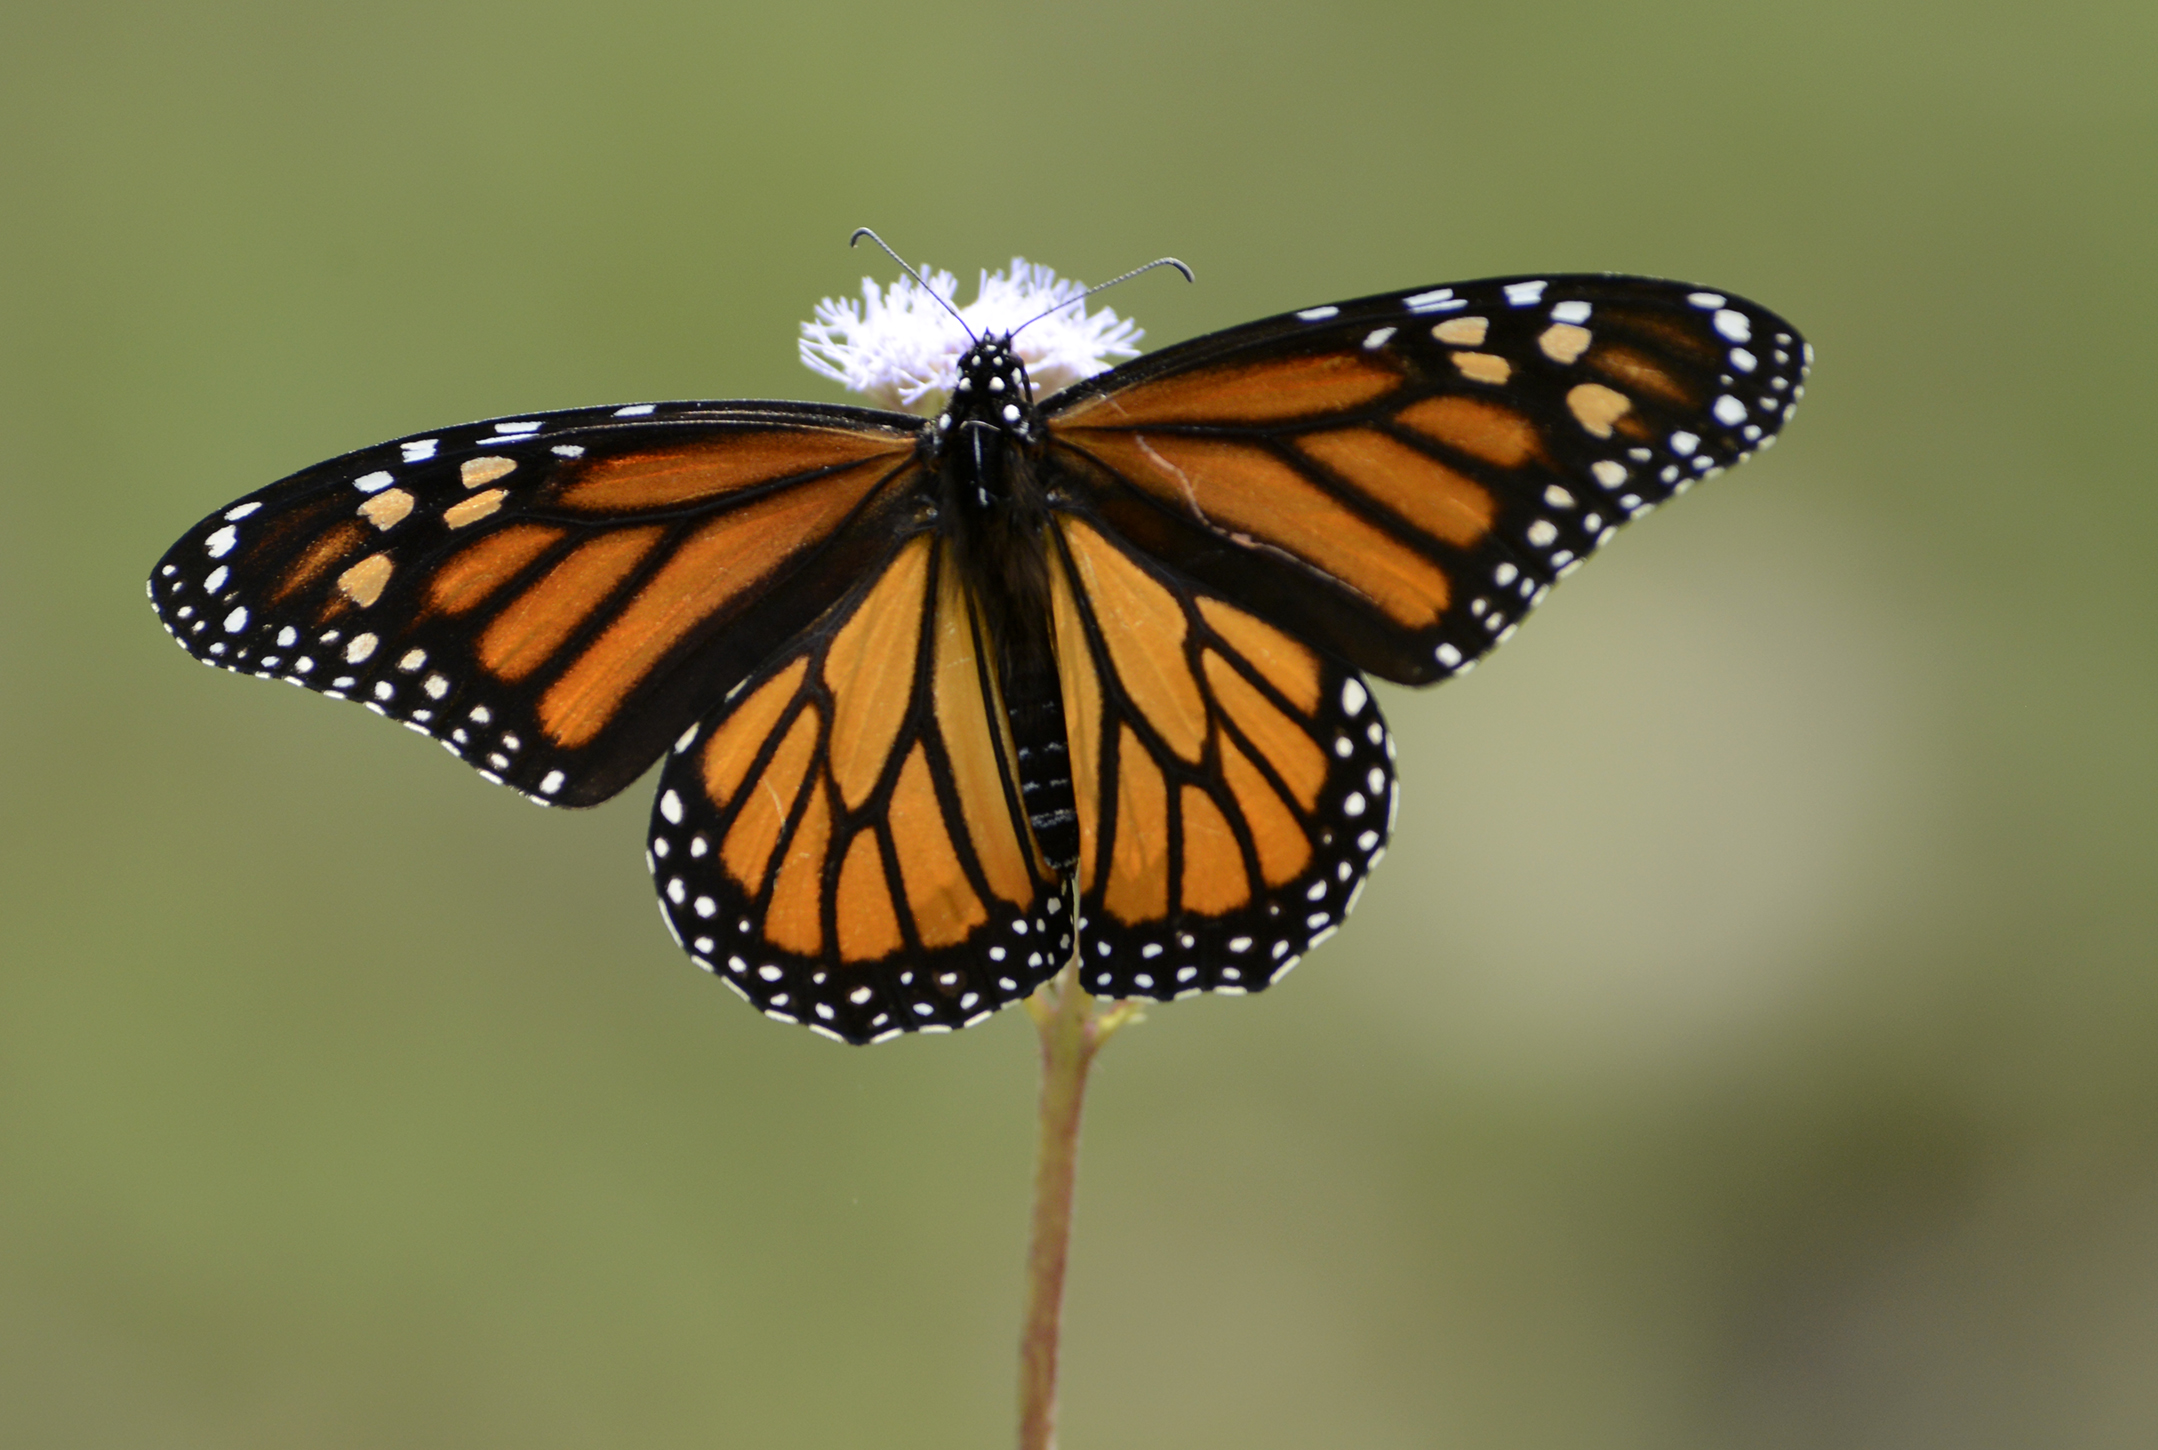

In [21]:
img

In [22]:
def AddBias(image, bias):
    ImageWidth = image.shape[0]
    ImageHeight = image.shape[1]
    ImageDepth = image.shape[2]

    for i in range(ImageDepth):
        image[:, :, i] += bias[i]
    return image

In [23]:
def Activation(image):
    ImageWidth = image.shape[0]
    ImageHeight = image.shape[1]
    ImageDepth = image.shape[2]

    # ReLu function definintion
    mask = image >= 0
    # Applying the ReLu function
    image = image*mask
    
    return image  

In [24]:
def ConvolutionFunction(image, filter, stride, padding):
    FilterWidth = filter.shape[0]
    FilterHeight = filter.shape[1]
    FilterDepth = filter.shape[2]
    
    image = np.pad(image,((padding,padding),(padding,padding),(0,0)),'constant',constant_values=(0,0))

    ImageWidth = image.shape[0]
    ImageHeight = image.shape[1]
    ImageDepth = image.shape[2]

    OutputWidth = int((ImageWidth-FilterWidth)/stride) + 1
    OutputHeight = int((ImageHeight-FilterHeight)/stride) + 1
    output = np.zeros((OutputWidth, OutputHeight, FilterDepth))

    for i in range(OutputWidth):
        for j in range(OutputHeight):
            for k in range(FilterDepth):
                output[i, j, k] = np.sum(np.repeat(filter[:, :,k].reshape(FilterWidth, FilterHeight,1),image.shape[-1],axis = 2)*image[i*stride:i*stride+FilterWidth , j*stride:j*stride+FilterHeight , :])
    return output

In [25]:
def MaxPool(image, size, stride):
    ImageWidth = image.shape[0]
    ImageHeight = image.shape[1]
    ImageDepth = image.shape[2]
    OutputWidth = int((ImageWidth - size)/stride) + 1
    OutputHeight = int((ImageHeight - size)/stride) + 1
    output = np.zeros((OutputWidth, OutputHeight, ImageDepth))
    for i in range(OutputWidth):
        for j in range(OutputHeight):
            for k in range(ImageDepth):
                output[i, j, k] = np.max(image[i*stride:i*stride+size, j*stride:j*stride+size, k])
    return output


In [26]:
def InceptionModule(image, f1, f2, f3, f4, f5, f6, b1, b2, b3, b4, b5, b6):
    input = []
    input.append(image)
    # conv1
    input.append(Activation(ConvolutionFunction(image,f1,1,0) + b1))
    # conv2
    input.append(Activation(ConvolutionFunction(image,f2,1,0) + b2))
    input[-1] = Activation(ConvolutionFunction(input[-1],f3,1,1) + b3)
    # conv3
    input.append(Activation(ConvolutionFunction(image,f4,1,0) + b4))
    input[-1] = Activation(ConvolutionFunction(input[-1],f5,1,2) + b5)
    # conv4
    input.append(Activation(ConvolutionFunction(MaxPool(image,1,1),f6,1,0) + b6))
    #returning the concatenated block
    return np.concatenate((input[1],input[2],input[3],input[4]),axis = 2)

In [27]:
def BT19ECE107_GoogLeNet (image):
    weights = []
    bias = []

    input = []
    input.append(image)
    
    # conv 1, maxpool 1
    weights.append(np.random.randn(7,7,64))
    bias.append(np.random.randn(1,1))
    input.append(MaxPool(Activation(ConvolutionFunction(input[-1], weights[-1],2,3) + bias[-1]),3,2))
    
    # conv 2
    weights.append(np.random.randn(1,1,64))
    bias.append(np.random.randn(1,1))
    input.append(Activation(ConvolutionFunction(input[-1], weights[-1],1,0) + bias[-1]))
    
    # conv 3 
    weights.append(np.random.randn(3,3,192))
    bias.append(np.random.randn(1,1))
    input.append(MaxPool(Activation(ConvolutionFunction(input[-1], weights[-1],1,1) + bias[-1]),3,2))

    # defining the empty variables
    inc_w = []
    inc_b = []

    # inception 1
    inc_w.append(np.random.randn(1,1,64))
    inc_b.append(np.random.randn(1,1))
    inc_w.append(np.random.randn(1,1,96))
    inc_b.append(np.random.randn(1,1))
    inc_w.append(np.random.randn(3,3,128))
    inc_b.append(np.random.randn(1,1))
    inc_w.append(np.random.randn(1,1,16))
    inc_b.append(np.random.randn(1,1))
    inc_w.append(np.random.randn(5,5,32))
    inc_b.append(np.random.randn(1,1))
    inc_w.append(np.random.randn(1,1,32))
    inc_b.append(np.random.randn(1,1))
    
    weights.append(inc_w)
    input.append(InceptionModule(input[-1], inc_w[0], inc_w[1], inc_w[2], inc_w[3], inc_w[4], inc_w[5], inc_b[0], inc_b[1], inc_b[2], inc_b[3], inc_b[4], inc_b[5]))
    
    # inception2
    inc_w = []
    inc_b = []
    inc_w.append(np.random.randn(1,1,128))
    inc_b.append(np.random.randn(1,1))
    inc_w.append(np.random.randn(1,1,128))
    inc_b.append(np.random.randn(1,1))
    inc_w.append(np.random.randn(3,3,192))
    inc_b.append(np.random.randn(1,1))
    inc_w.append(np.random.randn(1,1,32))
    inc_b.append(np.random.randn(1,1))
    inc_w.append(np.random.randn(5,5,96))
    inc_b.append(np.random.randn(1,1))
    inc_w.append(np.random.randn(1,1,64))
    inc_b.append(np.random.randn(1,1))

    weights.append(inc_w)
    input.append(InceptionModule(input[-1], inc_w[0], inc_w[1], inc_w[2], inc_w[3], inc_w[4], inc_w[5], inc_b[0], inc_b[1], inc_b[2], inc_b[3], inc_b[4], inc_b[5]))
    # maxpool2
    input.append(MaxPool(input[-1],3,2))

    # inception3
    inc_w = []
    inc_b = []

    inc_w.append(np.random.randn(1,1,192))
    inc_b.append(np.random.randn(1,1))
    inc_w.append(np.random.randn(1,1,96))
    inc_b.append(np.random.randn(1,1))
    inc_w.append(np.random.randn(3,3,208))
    inc_b.append(np.random.randn(1,1))
    inc_w.append(np.random.randn(1,1,16))
    inc_b.append(np.random.randn(1,1))
    inc_w.append(np.random.randn(5,5,48))
    inc_b.append(np.random.randn(1,1))
    inc_w.append(np.random.randn(1,1,64))
    inc_b.append(np.random.randn(1,1))

    weights.append(inc_w)
    
    input.append(InceptionModule(input[-1], inc_w[0], inc_w[1], inc_w[2], inc_w[3], inc_w[4], inc_w[5], inc_b[0], inc_b[1], inc_b[2], inc_b[3], inc_b[4], inc_b[5]))

    # inception4
    inc_w = []
    inc_b = []

    inc_w.append(np.random.randn(1,1,160))
    inc_b.append(np.random.randn(1,1))
    inc_w.append(np.random.randn(1,1,112))
    inc_b.append(np.random.randn(1,1))
    inc_w.append(np.random.randn(3,3,224))
    inc_b.append(np.random.randn(1,1))
    inc_w.append(np.random.randn(1,1,24))
    inc_b.append(np.random.randn(1,1))
    inc_w.append(np.random.randn(5,5,64))
    inc_b.append(np.random.randn(1,1))
    inc_w.append(np.random.randn(1,1,64))
    inc_b.append(np.random.randn(1,1))
    
    weights.append(inc_w)
    input.append(InceptionModule(input[-1],inc_w[0],inc_w[1],inc_w[2],inc_w[3],inc_w[4],inc_w[5],inc_b[0],inc_b[1],inc_b[2],inc_b[3],inc_b[4],inc_b[5]))

    # inception5
    inc_w = []
    inc_b = []

    inc_w.append(np.random.randn(1,1,128))
    inc_b.append(np.random.randn(1,1))
    inc_w.append(np.random.randn(1,1,128))
    inc_b.append(np.random.randn(1,1))
    inc_w.append(np.random.randn(3,3,256))
    inc_b.append(np.random.randn(1,1))
    inc_w.append(np.random.randn(1,1,24))
    inc_b.append(np.random.randn(1,1))
    inc_w.append(np.random.randn(5,5,64))
    inc_b.append(np.random.randn(1,1))
    inc_w.append(np.random.randn(1,1,64))
    inc_b.append(np.random.randn(1,1))

    weights.append(inc_w)
    input.append(InceptionModule(input[-1],inc_w[0],inc_w[1],inc_w[2],inc_w[3],inc_w[4],inc_w[5],inc_b[0],inc_b[1],inc_b[2],inc_b[3],inc_b[4],inc_b[5]))

    
    # inception6
    inc_w = []
    inc_b = []
    
    inc_w.append(np.random.randn(1,1,112))
    inc_b.append(np.random.randn(1,1))
    inc_w.append(np.random.randn(1,1,144))
    inc_b.append(np.random.randn(1,1))
    inc_w.append(np.random.randn(3,3,288))
    inc_b.append(np.random.randn(1,1))
    inc_w.append(np.random.randn(1,1,32))
    inc_b.append(np.random.randn(1,1))
    inc_w.append(np.random.randn(5,5,64))
    inc_b.append(np.random.randn(1,1))
    inc_w.append(np.random.randn(1,1,64))
    inc_b.append(np.random.randn(1,1))

    weights.append(inc_w)
    input.append(InceptionModule(input[-1],inc_w[0],inc_w[1],inc_w[2],inc_w[3],inc_w[4],inc_w[5],inc_b[0],inc_b[1],inc_b[2],inc_b[3],inc_b[4],inc_b[5]))


    # inception7
    inc_w = []
    inc_b = []

    inc_w.append(np.random.randn(1,1,256))
    inc_b.append(np.random.randn(1,1))
    inc_w.append(np.random.randn(1,1,160))
    inc_b.append(np.random.randn(1,1)) 
    inc_w.append(np.random.randn(3,3,320))
    inc_b.append(np.random.randn(1,1))
    inc_w.append(np.random.randn(1,1,32))
    inc_b.append(np.random.randn(1,1))
    inc_w.append(np.random.randn(5,5,128))
    inc_b.append(np.random.randn(1,1))
    inc_w.append(np.random.randn(1,1,128))
    inc_b.append(np.random.randn(1,1))
    
    weights.append(inc_w)
    input.append(InceptionModule(input[-1],inc_w[0],inc_w[1],inc_w[2],inc_w[3],inc_w[4],inc_w[5],inc_b[0],inc_b[1],inc_b[2],inc_b[3],inc_b[4],inc_b[5]))

    # inception8
    inc_w = []
    inc_b = []
    
    inc_w.append(np.random.randn(1,1,256))
    inc_b.append(np.random.randn(1,1))
    inc_w.append(np.random.randn(1,1,160))
    inc_b.append(np.random.randn(1,1))
    inc_w.append(np.random.randn(3,3,320))
    inc_b.append(np.random.randn(1,1))
    inc_w.append(np.random.randn(1,1,32))
    inc_b.append(np.random.randn(1,1))
    inc_w.append(np.random.randn(5,5,128))
    inc_b.append(np.random.randn(1,1))
    inc_w.append(np.random.randn(1,1,128))
    inc_b.append(np.random.randn(1,1))

    weights.append(inc_w)
    input.append(InceptionModule(input[-1],inc_w[0],inc_w[1],inc_w[2],inc_w[3],inc_w[4],inc_w[5],inc_b[0],inc_b[1],inc_b[2],inc_b[3],inc_b[4],inc_b[5]))

    # inception9
    inc_w = []
    inc_b = []

    inc_w.append(np.random.randn(1,1,384))
    inc_b.append(np.random.randn(1,1))
    inc_w.append(np.random.randn(1,1,192))
    inc_b.append(np.random.randn(1,1))
    inc_w.append(np.random.randn(3,3,384))
    inc_b.append(np.random.randn(1,1))
    inc_w.append(np.random.randn(1,1,48))
    inc_b.append(np.random.randn(1,1))
    inc_w.append(np.random.randn(5,5,128))
    inc_b.append(np.random.randn(1,1))
    inc_w.append(np.random.randn(1,1,128))
    inc_b.append(np.random.randn(1,1))

    weights.append(inc_w)
    input.append(InceptionModule(input[-1], inc_w[0], inc_w[1], inc_w[2], inc_w[3], inc_w[4], inc_w[5], inc_b[0], inc_b[1], inc_b[2], inc_b[3], inc_b[4], inc_b[5]))

    # appending the final maxpool
    input.append(MaxPool(input[-1],7,1))

    # returning the GoogLeNet model.
    return input[-1]

In [ ]:
OutputImage=BT19ECE107_GoogLeNet(img)

In [ ]:
OutputImage